# 1. Classification

In [1]:
# Import modules
from sklearn import datasets
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
digits = datasets.load_digits()

In [2]:
# Create data and label arrays
x = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = TTS(x, y, random_state=23, stratify=y)

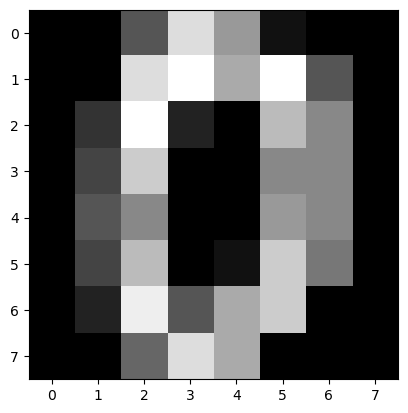

In [3]:
plt.imshow(x[0].reshape((8, 8)), cmap='gray')

# KNN

In [4]:
from sklearn.metrics import accuracy_score
#creating an instance for training dataset

cls = KNN(n_neighbors=3)
cls.fit(X_train, y_train)

#predicting for training dataset
predict_train_y = cls.predict(X_train)
train_score = accuracy_score(predict_train_y, y_train)
train_score

0.991833704528582

In [5]:
#predicting for test dataset

predict_test_y = cls.predict(X_test)
test_score = accuracy_score(predict_test_y, y_test)
test_score

0.9888888888888889

In [6]:
#using for loop to find the accurate number of k

def accuracy(k):
    
    training_scores =[]
    testing_scores = []
    
    for i in k:
        
        #create an instance
        cls = KNN(n_neighbors=i)
        cls.fit(X_train, y_train)
        
        #predicting values for each value of k in training dataset
        predict_train = cls.predict(X_train)
        accuracy_train = accuracy_score(predict_train, y_train)
        training_scores.append(accuracy_train)
        
        #predicting values for each value of k in testing dataset
        predict_test = cls.predict(X_test)
        accuracy_test = accuracy_score(predict_test, y_test)
        testing_scores.append(accuracy_test)
        
    return training_scores, testing_scores

In [7]:
k = range(1,9)

In [8]:
train, test = accuracy(k)

In [9]:
new_data = pd.DataFrame({'Training Accuracy': train, 'Testing Accuracy': test}, index=k)

In [10]:
new_data

,Training Accuracy,Testing Accuracy
1,1.000000,0.986667
2,0.991834,0.986667
3,0.991834,0.988889
4,0.991091,0.986667
5,0.988122,0.988889
6,0.988122,0.982222
7,0.985895,0.982222
8,0.987379,0.986667


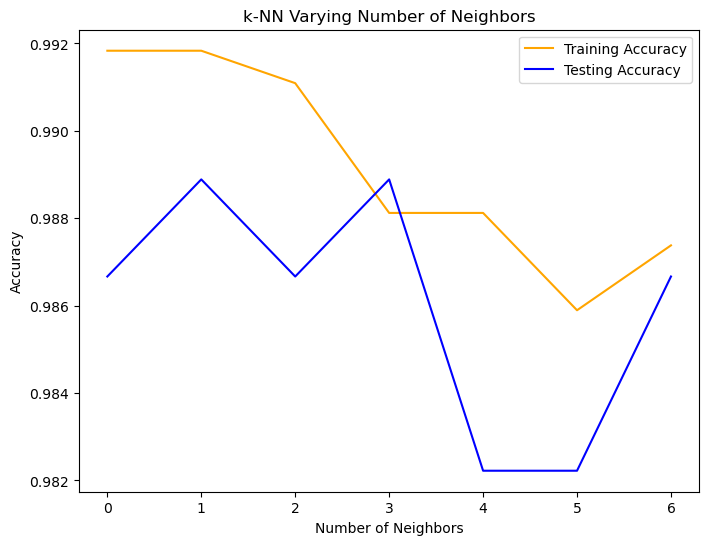

In [11]:
plt.figure(figsize=(8,6), dpi=100)
plt.plot(train[1:9], color='orange', label='Training Accuracy')
plt.plot(test[1:9], color='blue', label='Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('k-NN Varying Number of Neighbors');

the value of k=3 is the best in this scenario

# Kernels

In [12]:
# SVM/SVC Classifier
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for i in kernels:
    svm = SVC()
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    print('Kernel: ', i)
    print(classification_report(y_pred, y_test))

Kernel:  linear
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        44
           3       0.98      0.98      0.98        46
           4       0.98      1.00      0.99        44
           5       1.00      1.00      1.00        46
           6       1.00      1.00      1.00        45
           7       0.98      1.00      0.99        44
           8       1.00      0.96      0.98        45
           9       0.98      0.98      0.98        45

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450

Kernel:  poly
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00     

The linear and poly kernals look the best

# Naive Bayes

Text(50.722222222222214, 0.5, 'True label')

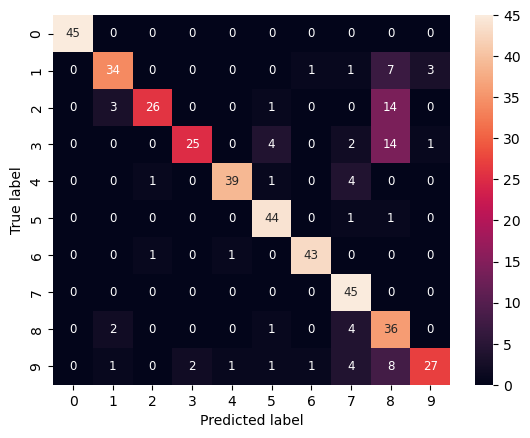

In [13]:
# Naive Bayes
bayes = GaussianNB()
bayes.fit(X_train, y_train)
y_pred = bayes.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(conf_matrix, annot=True, annot_kws=({'fontsize':8.5}))
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")

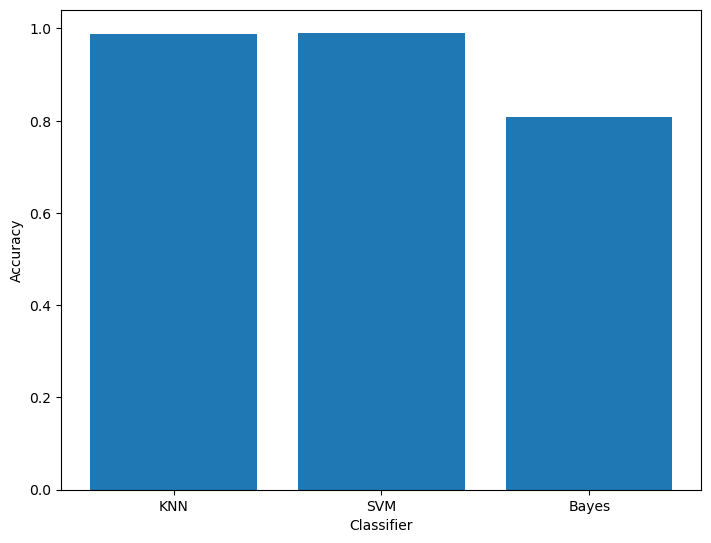

In [14]:
# Compare the accuracy of different classifiers in the same plot.
scores = []
labels = ["KNN", "SVM", "Bayes"]
classifiers = [
    KNN(n_neighbors=3),
    SVC(),
    GaussianNB()
]

# for each classifier in the list of above classifier

for classifier in classifiers:
    
    classifier.fit(X_train, y_train)
    score=classifier.score(X_test, y_test)
    scores.append(score)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,scores)
ax.set_xlabel("Classifier")
ax.set_ylabel("Accuracy")
plt.show()

# 2. Regression

In [15]:
# Load gapminder
df = pd.read_csv("gapminder (1).csv")
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


In [16]:
correlation = df.corr()

C:\Users\dudes\AppData\Local\Temp\ipykernel_11064\3853220190.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

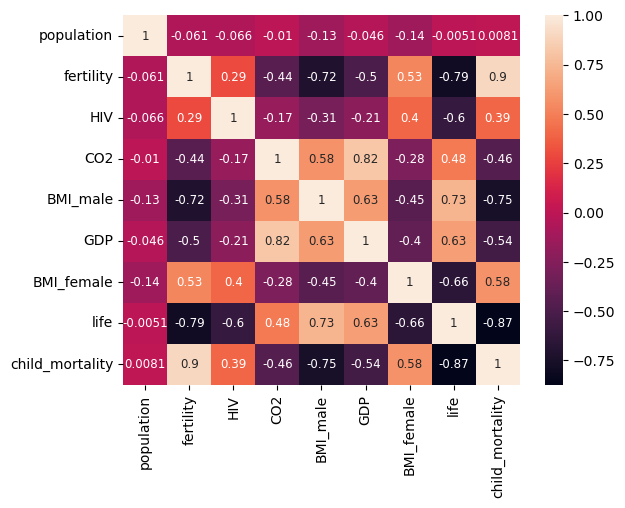

In [17]:
# Heatmap
sns.heatmap(correlation, annot=True, annot_kws=({'fontsize':8.5}))

In [18]:
df.shape

(139, 10)

In [19]:
df.isna().sum()

population         0
fertility          0
HIV                0
CO2                0
BMI_male           0
GDP                0
BMI_female         0
life               0
child_mortality    0
Region             0
dtype: int64

In [28]:
x = df["fertility"]
y = df["life"]

x= x.values.reshape(-1,1)
y=y.values.reshape(-1,1)

In [37]:
# Linear Regression

regression = LinearRegression()
regression.fit(x, y)
predict_y = regression.predict(x)

from sklearn.metrics import mean_squared_error as MSE

error = MSE(predict_y, y)

error

31.456396106894605

In [78]:
print(regression.score(x, y))

0.6192442167740035


Text(0.5, 1.0, 'Life Expectancy with respect to Fertility\n Mean Squared Error = 31.46')

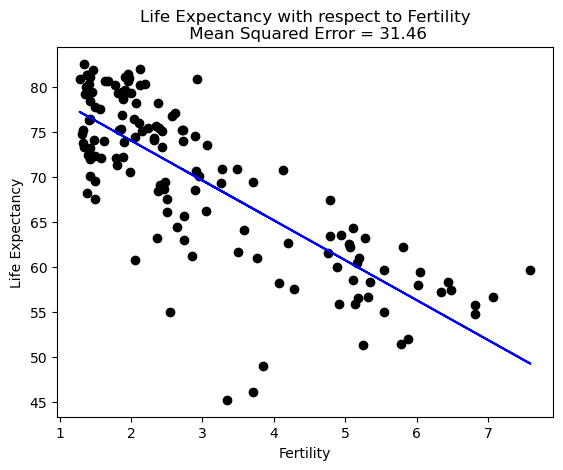

In [42]:
plt.scatter(x, y, color='black')
plt.plot(x, predict_y, color='blue')
plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy with respect to Fertility\n Mean Squared Error = {}'.format(round(error,2)))

There is a strong correlation between the Fertility and Life Expectancy. It means that when the fertility is low the expectany is higher and vice versa. There is negative correlation.

In [43]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


In [58]:
# Linear regression on all
X = df.drop(columns=['population', 'life', 'Region', 'GDP'])
Y = df['life']

In [59]:
X.shape, Y.shape

((139, 6), (139,))

In [80]:
X

,fertility,HIV,CO2,BMI_male,BMI_female,child_mortality
0,2.73,0.1,3.328945,24.59620,129.9049,29.5
1,6.43,2.0,1.474353,22.25083,130.1247,192.0
2,2.24,0.5,4.785170,27.50170,118.8915,15.4
3,1.40,0.1,1.804106,25.35542,132.8108,20.0
4,1.96,0.1,18.016313,27.56373,117.3755,5.2
...,...,...,...,...,...,...
134,2.11,0.5,2.489764,26.39123,124.2604,13.0
135,2.46,0.1,4.476669,25.32054,124.3462,49.2
136,1.86,0.4,1.479347,20.91630,121.9367,26.2
137,5.88,13.6,0.148982,20.68321,132.4493,94.9


In [81]:
#applying linear regression

from sklearn.linear_model import LinearRegression

regression_all = LinearRegression()
regression_all.fit(X, Y)
predict_y_combined = regression_all.predict(X)

print(regression_all.score(X, Y))

0.8737457754381146


Comparing both the models Scores

Model score 1 = 0.6192442167740035
Model score 2 = 0.8737457754381146

Model score 2 is performing better

In [87]:
# Cross validation score
score_model1 = cross_val_score(regression, x, y, cv=5)
score_model2 = cross_val_score(regression_all, X, Y, cv=5)

In [88]:
print('Mean Accuracy Score for Model 1 = {}\n Mean Accuracy Score for Model 2 = {}'.format(score_model1.mean(), score_model2.mean()))

Mean Accuracy Score for Model 1 = 0.6168819644425119
 Mean Accuracy Score for Model 2 = 0.8348362629805335


# Logistic Regression

In [90]:
# Load creditcard
df2 = pd.read_csv("creditcard (1).csv")
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


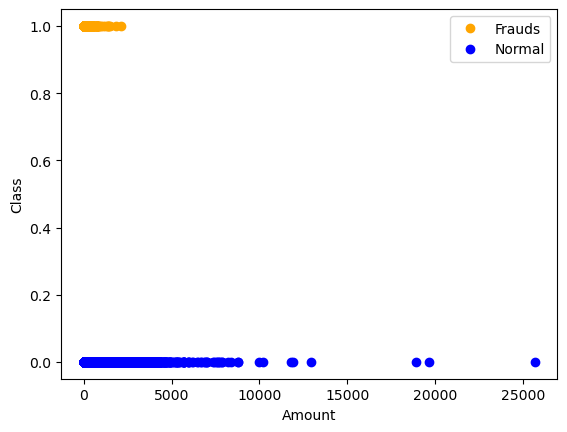

In [91]:
# Class and amount comparison
frauds = df2.loc[df2['Class']==1]
non_frauds = df2.loc[df2['Class']==0]
plt.plot(frauds.Amount, frauds.Class, 'o', color="orange", label="Frauds")
plt.plot(non_frauds.Amount, non_frauds.Class, 'bo', label="Normal")
plt.xlabel("Amount")
plt.ylabel("Class")
plt.legend()

The Frauds are occuring at low amounts

C:\Users\dudes\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(50.722222222222214, 0.5, 'True label')

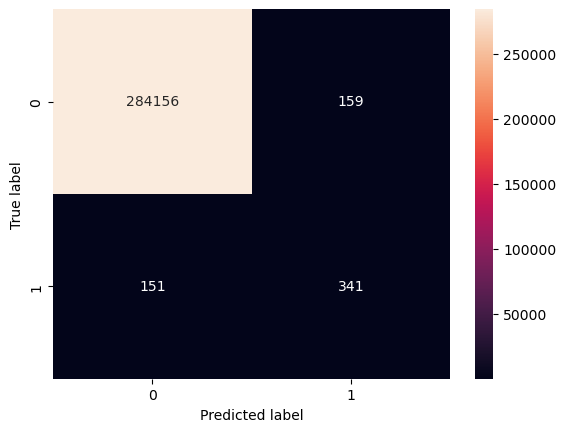

In [95]:
# Logistic Regression
X = df.drop("Class", axis=1)
y = df.Class

log_regression = LogisticRegression()
log_regression.fit(X, y)
y_pred = log_regression.predict(X)
conf_matrix = confusion_matrix(y, y_pred)

ax = sns.heatmap(conf_matrix, annot=True, fmt='d')
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")